In [1]:
import pandas as pd
from cooking_bot import REPO_PATH
import os
os.chdir(REPO_PATH)
from cooking_bot.encoders import get_sentence_embedding
import json
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt

In [2]:
with open("datasets/new_data.json") as f:
    
    data = json.load(f)


# erase duplicates
print(len(data))
data = list(set(map(tuple,data)))
len(data)

2130


1129

In [3]:
texts = [tup[0] for tup in data]
embeddings = [get_sentence_embedding(text) for text in tqdm(texts)]
embeddings = torch.tensor(embeddings)
sims = embeddings @ embeddings.T
sims.fill_diagonal_(0)
topk = torch.topk(sims, k = 1, dim = 1)
values, idxs = topk.values.flatten(), topk.indices.flatten()

  0%|          | 0/1129 [00:00<?, ?it/s]

100%|██████████| 1129/1129 [00:14<00:00, 76.36it/s] 


In [4]:
(values>0.985).numpy().mean(), (values==1.0).numpy().mean()

(0.08237378210806023, 0.0)

In [5]:
keep = set()
drop = set()
for text, val, idx in zip(texts, values, idxs):
    
    if text in drop:
        continue
    
    
    
    if val> 0.985 and idx not in keep:
        keep.add(text)
        drop.add(int(idx))

data = [b for a,b in enumerate(data) if a not in drop]
len(data)

1039

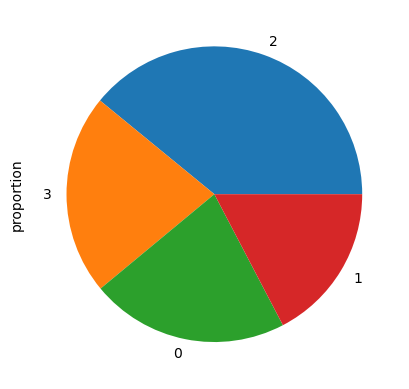

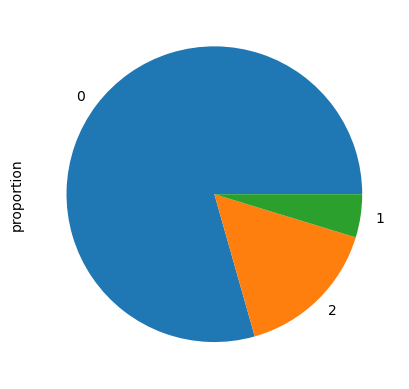

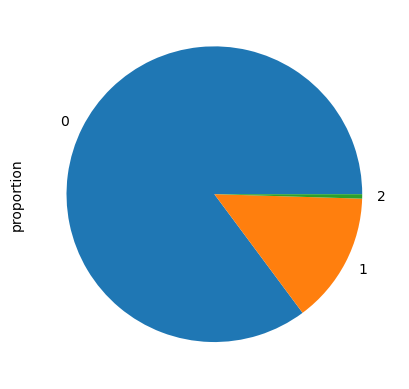

In [6]:
df = pd.DataFrame(data, columns=["text","queries", "time", "difficulty"])
df.queries.value_counts(True).plot.pie()
plt.show()
df.time.value_counts(True).plot.pie()
plt.show()
df.difficulty.value_counts(True).plot.pie()
plt.show()

df.to_csv("datasets/new_clean.csv")

In [7]:
with open("datasets/new_broad.json") as f:
    
    specific = json.load(f)
print(len(specific))
specific = list(set(map(tuple,specific)))
print(len(specific))

533
371


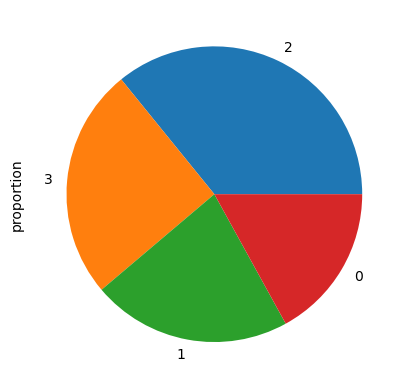

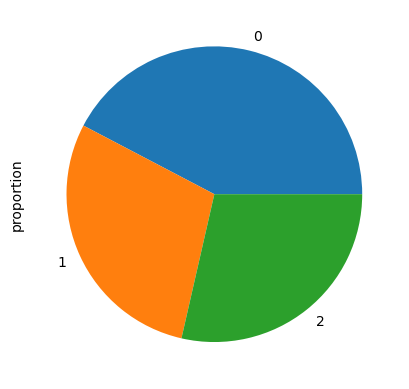

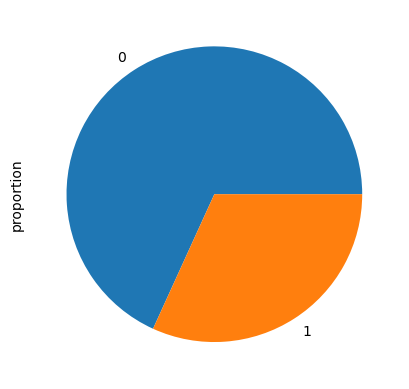

371

In [8]:
spec = pd.DataFrame(specific, columns=["text","queries", "time", "difficulty"])

spec.queries.value_counts(True).plot.pie()
plt.show()
spec.time.value_counts(True).plot.pie()
plt.show()
spec.difficulty.value_counts(True).plot.pie()
plt.show()

spec.to_csv("datasets/spec.csv")
len(spec)